In [1]:
import numpy as np
import os
#Visualizations
import matplotlib.pyplot as plt
import random
from datetime import datetime
import itertools

import swnHeatKernels as swnN 
from scipy import linalg
import helperFunc as hf
import swnMetrics as swn
import centrality as ce
import modularity as modu

In [2]:
def plotAdjMatrices(dictData,cmap = 'Greys',filePath = 'False'):

    numofData = len(dictData)

    plt.rcParams['figure.figsize'] = [20, 7]

    for counter,key in enumerate(dictData):

        A = dictData[key]
        AReord = swn.reorderA2Visualize(A)
        plt.subplot(1, numofData, counter + 1)
        plt.title(str(key))
        plt.imshow(AReord, cmap=cmap)
        plt.clim(0,1.8)
        #plt.colorbar()
    
    if filePath is not 'False':
        directory = os.path.dirname(filePath)
        if not os.path.exists(directory):  # makes the directory if it does not exist
            os.makedirs(directory)
        plt.savefig(filePath, format='eps', dpi=1200)        
        
    
    plt.show() 

In [3]:
pRandRewire = 0; tau = 3.3; rewirings = [500,1000,2000, 4000]
vertices = 100; edges = int(np.round(2 * np.log(vertices) * (vertices - 1), decimals=0))

Arand = swn.generateWeightRandSymAdj(vertices, edges)

In [4]:
Adict = swnN.rewireHeatKernelManyInstances(Arand, pRandRewire, rewirings, tau)

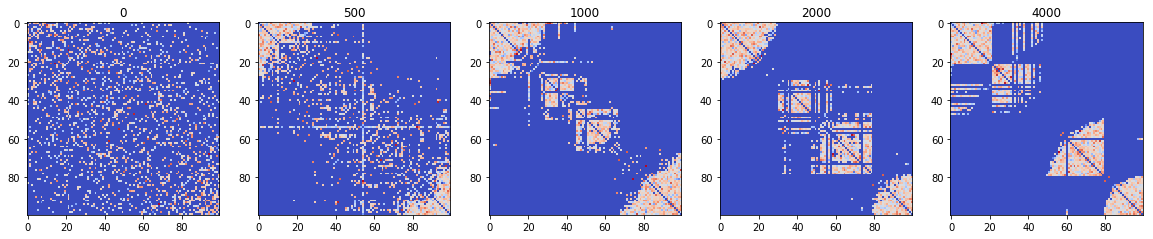

In [5]:
cmap = 'coolwarm'
plotAdjMatrices(Adict,cmap)
